In [23]:
import matplotlib.pyplot as plt
import csv
import numpy as np

In [24]:
#create a function to read data from csv into two sequences
def data_import():
    income = []
    happiness = []
    with open('income.csv') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)
        for row in reader:
            income.append(float(row[0]))
            happiness.append(float(row[1]))
        return income, happiness

In [25]:
#Copy the  sequence into numpy vectors
income,happiness=data_import()
income=np.array(income)
happiness=np.array(happiness)

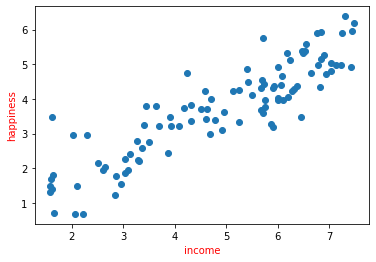

In [26]:
#Visualize the data with scatter plot
def data_visualize(X, Y):
    plt.xlabel('income',color ='red')
    plt.ylabel('happiness',color ='red')
    plt.scatter(X, Y)
    plt.show()
if __name__ == '__main__':
    X, Y = data_import()
    data_visualize(X, Y)

In [70]:
# Check if association i.e. correlation exist in data
def corr(income,happiness):
    data_len = len(income)
    b = []
    for i,j in zip(income,happiness):
        b.append(i*j)
        
    sum_b = sum(b)
    sum_income = sum(income)
    sum_happiness = sum(happiness)
    sq_sum_income = sum_income**2
    sq_sum_happiness = sum_happiness**2
    
    
    income_sq = []
    for i in income:
        income_sq.append(i**2)
    income_sq_sum = sum(income_sq)
    
    happiness_sq=[]
    for j in happiness:
        happiness_sq.append(j**2)
    happiness_sq_sum = sum(happiness_sq)
    
    #formula of correlation
    
    num = data_len*sum_b - sum_income*sum_happiness
    deno_term1 = data_len*income_sq_sum - sq_sum_income
    deno_term2 = data_len*happiness_sq_sum - sq_sum_happiness
    deno = (deno_term1*deno_term2)**0.5
    
    # calculate correlation
    correlation = num/deno

    return correlation

# calculate correleation
# if correlation coefficient is not equal to 0 then their is association in the observed and response variable in our data, otherwise not.
# if correlation coeffecient is greater than 0 , it is positive correlation.
# if correlation coeffecient is less than 0 , it is negative correlation. 
corr(income,happiness)

0.8867953464637361

In [46]:
# correlation coeffecient is greater than 0 , it is positive correlation.
# hence their is association in the observed and response variable in our data.

In [43]:
def mean(a):
    n=len(a)
    a_mean=sum(a)/n
    return a_mean

def var(a, ddof=0):
    n = len(a)
    mean = sum(a) / n
    c= sum((x - mean) ** 2 for x in data) / (n - ddof)
    return c

def std(data):
    var = variance(data)
    std_dev = (var)**0.5
    return std_dev

In [51]:
income_mean=mean(income)
happiness_mean=mean(happiness)

In [66]:
# Fit the model
# 6.1 Compute Beta_0 and Beta_1 from observations
# 6.2. Create your fitted line y = Beta_0 + Beta_1 * X 

n = 0
d = 0
for i in range(len(income)):
    n = n + (income[i] - income_mean)*(happiness[i] - happiness_mean)
    d = d + (income[i] - income_mean)**2
    
Beta_1 = n / d
Beta_0 = happiness_mean - Beta_1*income_mean

print("the value of Beta_1 :",Beta_1)
print("the value of Beta_0 : ", Beta_0)
print("\n\n")
print("y(predicted) = Beta_0 + Beta_1*X")
print("y(predicted) = {} + {}*X".format(Beta_0,Beta_1))

the value of Beta_1 : 0.689590169883646
the value of Beta_0 :  0.36140894954242464



y(predicted) = Beta_0 + Beta_1*X
y(predicted) = 0.36140894954242464 + 0.689590169883646*X


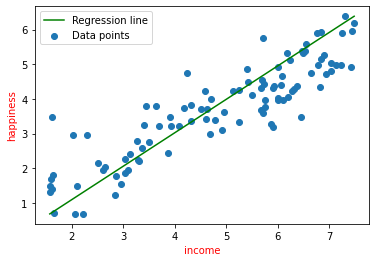

In [64]:
#Plot the fittd line
plt.scatter(income,happiness, label="Data points")
plt.plot([min(income),max(income)], [min(happiness) ,max(happiness)] ,label="Regression line" ,color="green" )
plt.xlabel('income', color="red")
plt.ylabel('happiness',color="Red")
plt.legend()
plt.show()

In [69]:
# Calculate R-Square
ss_t = 0
ss_r = 0
for i in range(len(income)):
    y = Beta_1*income[i] + Beta_0
    ss_t = ss_t + (happiness[i] - happiness_mean) ** 2
    ss_r = ss_r + (happiness[i] - y) ** 2

r_sq = 1 - (ss_r/ss_t)
print("The R-square is : ", r_sq)

The R-square is :  0.7864059865097413


In [90]:
# Create Anova Table
ss_reg = 0.0
ss_res = 0.0
for i in range(100):
    y = Beta_1*income[i] + Beta_0
    ss_reg = ss_reg + (y-happiness_mean)**2
    ss_res = ss_res + (happiness[i]-y)**2 
print("SS_regression :", ss_reg, "\nSS_residual:", ss_res,"\nSS_total :", ss_reg+ss_res)

SS_regression : 143.5199312874863 
SS_residual: 38.98113527288191 
SS_total : 182.5010665603682


In [91]:
n = len(income)
ms_reg = (ss_reg/1)
ms_res = (ss_res/(n-2))
print("MS Regression :", ms_reg, "\nMS Residual :", ms_res)

MS Regression : 143.5199312874863 
MS Residual : 0.39776668645797864


In [92]:
F_stats = (ms_reg/ms_res)
print("F-stats : ", F_stats)
std_Error = (ms_res**0.5) 
print("Std Err :", std_Error)

F-stats :  360.81435719390794
Std Err : 0.6306874713025292


In [93]:
# anova table
F_significant = 1.2767E-34 #from table
print("ANOVA\n","\t\t","degree of freedom\t\t", "SS\t\t", "MS\t\t", "\tF-stats\t", "\t\tsignificance-F")
print("\nRegression\t\t", 1, "\t\t", ss_regression, "\t", ms_regression, "\t", F_stats, "\t", F_significant)
print("\nResidual\t", "100-2 =", 98, "\t\t", ss_residual, "\t", ms_residual )
print("\nTotal\t\t", "100-1 =", 99, "\t\t", ss_regression+ss_residual )

ANOVA
 		 degree of freedom		 SS		 MS		 	F-stats	 		significance-F

Regression		 1 		 143.5199312874863 	 143.5199312874863 	 360.81435719390794 	 1.2767e-34

Residual	 100-2 = 98 		 38.98113527288191 	 0.39776668645797864

Total		 100-1 = 99 		 182.5010665603682
